In [114]:
#Notas::


# checa que onda con correlated variables como year y milage (maybe estas no, porque afectan diferente no see)

In [115]:
#import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

import statsmodels.api as sm

In [116]:
df = pd.read_csv("vw.csv")

In [117]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


In [118]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [119]:
#df.describe()

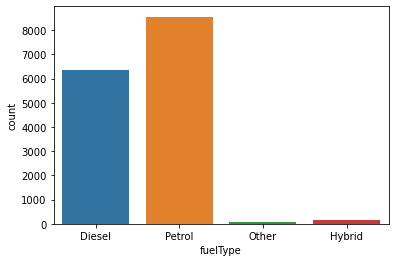

In [120]:
sns.countplot(df["fuelType"])

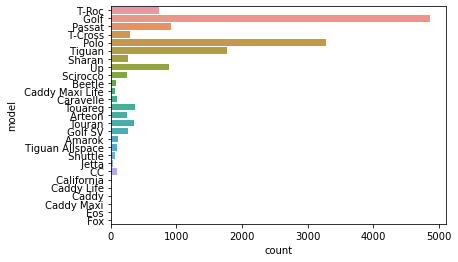

In [121]:
sns.countplot(y = df["model"])

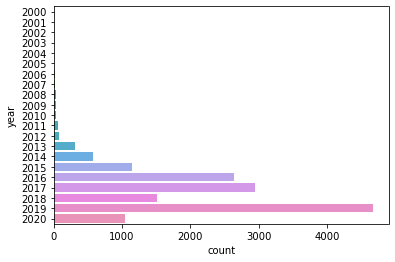

In [122]:
sns.countplot(y = df["year"])

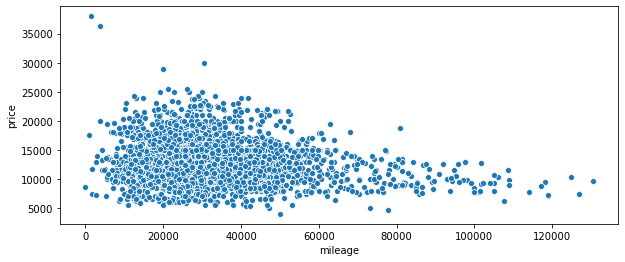

In [123]:
plt.figure(figsize=(10,4)) 
df2 = df[df["year"]==2016]
sns.scatterplot(df2["mileage"], df2["price"])

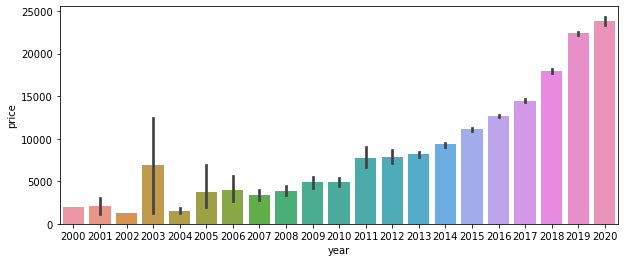

In [124]:
plt.figure(figsize=(10,4)) 
sns.barplot(x = df["year"], y = df["price"])

In [125]:
#sns.pairplot(df)

In [126]:
# OJO aqui en nuestro proyecto podria ser 
# df["age_of_car"] = (año de venta) - df["year"]

df["age_of_car"] = 2020 - df["year"]
df = df.drop(columns = ["year"])
df.sample(10)

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age_of_car
3617,Golf,19975,Automatic,6000,Petrol,145,44.8,1.5,1
13003,Up,11495,Manual,4371,Petrol,145,55.4,1.0,1
14124,Touran,17498,Manual,12303,Petrol,145,52.3,1.2,2
9804,Polo,12490,Manual,14152,Petrol,145,64.2,1.0,2
9012,Polo,9995,Manual,16444,Petrol,20,60.1,1.0,4
10803,Tiguan,29790,Manual,5000,Diesel,145,47.9,2.0,0
2687,Golf,13330,Manual,50584,Diesel,20,67.3,2.0,5
7285,Polo,12991,Manual,13153,Petrol,145,64.2,1.0,2
10963,Tiguan,17999,Semi-Auto,21430,Diesel,165,49.6,2.0,5
13634,Touareg,22990,Automatic,39239,Diesel,235,42.8,3.0,4


In [127]:
df = pd.get_dummies(df)
df.head()

# Este compa lo que hace es crear dummies para cada cosa con 0 y 1. Nosotros lo hariamos con 1,2,3,4?
# Probar que esta mejor
# si tiene mas sentido porque das mucho mas parametros a tu regrecion, es decir, si solo clasificaramos los
# modelos del 1 al n, solamente tendriamos una Beta para todos, la cual se haria mas grande mientras
# el numero del modelo sea mas grande, y esto no es efectivo, mejor tener una dummy para cada
# modelo que asigne una beta a cada uno..!!

,price,mileage,tax,mpg,engineSize,age_of_car,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,...,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,25000,13904,145,49.6,2.0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,26883,4562,145,49.6,2.0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,20000,7414,145,50.4,2.0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,33492,4825,145,32.5,2.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,22900,6500,150,39.8,1.5,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [128]:
# stratify??


X = df.drop("price", axis = "columns")
y = df["price"]

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.25, random_state = 0)

In [129]:
X.columns

Index(['mileage', 'tax', 'mpg', 'engineSize', 'age_of_car', 'model_ Amarok',
       'model_ Arteon', 'model_ Beetle', 'model_ CC', 'model_ Caddy',
       'model_ Caddy Life', 'model_ Caddy Maxi', 'model_ Caddy Maxi Life',
       'model_ California', 'model_ Caravelle', 'model_ Eos', 'model_ Fox',
       'model_ Golf', 'model_ Golf SV', 'model_ Jetta', 'model_ Passat',
       'model_ Polo', 'model_ Scirocco', 'model_ Sharan', 'model_ Shuttle',
       'model_ T-Cross', 'model_ T-Roc', 'model_ Tiguan',
       'model_ Tiguan Allspace', 'model_ Touareg', 'model_ Touran',
       'model_ Up', 'transmission_Automatic', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Hybrid',
       'fuelType_Other', 'fuelType_Petrol'],
      dtype='object')

In [130]:
# luego hace una madre para seleccionar best features (nos la saltamos)
# hay varias feature selection techniques, investigar de esto

In [131]:
model = Ridge()
model.fit(XTrain, yTrain)

Ridge()

In [132]:
model.score(XTrain, yTrain)

0.8878396636064102

In [133]:
model.score(XTest,yTest)

0.8917479053342318

In [134]:
model.predict(XTest)

array([21822.47056415, 18820.27301337,  9541.61050425, ...,
       19812.10680534, 15109.01273232, 20736.38323411])

In [135]:
XTest.head()

,mileage,tax,mpg,engineSize,age_of_car,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,model_ Caddy,...,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
6617,1155,145,45.6,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3515,20742,30,62.8,2.0,3,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
8241,35254,20,60.1,1.2,4,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
167,4407,145,50.4,1.6,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1391,29441,20,67.3,2.0,4,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [136]:
yTest.head()

6617    23500
3515    19990
8241    10395
167     19995
1391    16298
Name: price, dtype: int64

In [137]:
model2 = RandomForestRegressor()#max_depth=2, random_state=0)
model2.fit(XTrain, yTrain)
model2.score(XTest,yTest)

0.948953715316463

In [141]:
a = model2.predict(XTest)

In [142]:
a[:5]

array([22661.54333333, 18378.66      ,  9091.47      , 21511.82      ,
       16267.37      ])